# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [5]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

import seaborn as sns

### Step 2: Read in your data set 

In [7]:
#Read in data from source 
df_raw = pd.read_csv("/Users/Jarence/desktop/ga-data-science-course/projects/unit-projects/project-2/assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [8]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [9]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [10]:
print len(df_raw)
print df_raw.columns

400
Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')


In [11]:
df_raw.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because generally GRE has a larger base number from the start 

#### Question 4. Drop data points with missing data


In [13]:
print df_raw.isnull().values.any()

True


In [30]:
missing_data = df_raw['admit'] == 0
missing_data.count()

400

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: The values that contain zero for admit, or we can also say its min is zero

#### Question 6. Create box plots for GRE and GPA

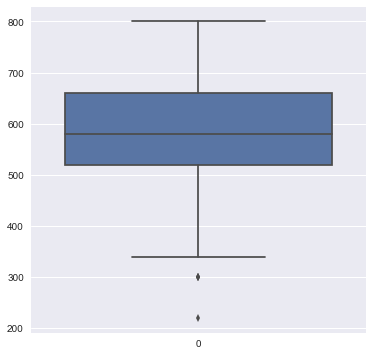

In [14]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df_raw['gre'])
plt.show()

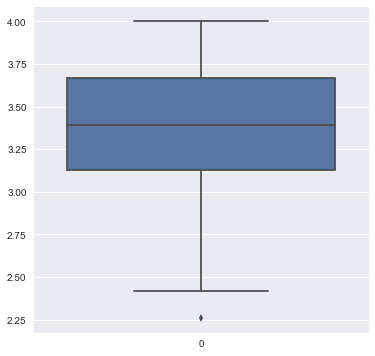

In [15]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df_raw['gpa'])
plt.show()

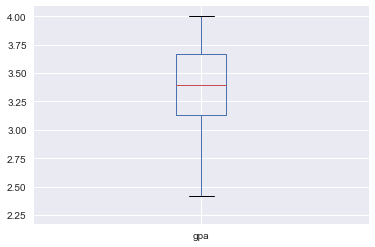

In [21]:
df_raw['gpa'].plot(kind = 'box')

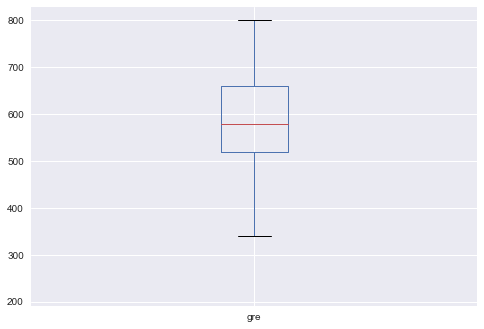

In [33]:
df_raw['gre'].plot(kind = 'box')

#### Question 7. What do this plots show?

Answer: The box plots show us the median, upper quartile, lower quartile, upper whisker and lower whisker of both gpa and gre. We can see that their figures differ greatly. In addition, both gre and gpa have outliers as shown from the box plots made by seaborn. 

#### Question 8. Describe each distribution 

In [20]:
print df_raw['gre'].skew()
print df_raw['gpa'].skew()
print df_raw['prestige'].skew()
print df_raw['admit'].skew()

-0.150126665946
-0.211765490335
0.093662653554
0.787051304759


In [21]:
print df_raw['gre'].kurt()
print df_raw['gpa'].kurt()
print df_raw['prestige'].kurt()
print df_raw['admit'].kurt()

-0.330065338167
-0.574622543215
-0.894758613394
-1.38751295838


#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. Kurt and skew aids with the visualization of the data distribution to understand whether our model is nromally distributed, in order for it to be normally distributed, the figures should be closer to zero, the close it is to zero, the closer the distribution is normally distributed. Since, the two facotrs namely, gpa and gre are negatively skewed to the left as shown from their skew figures, our assumption of a normal distribution is not correct.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

#### Question 11. Which of our variables are potentially colinear? 

In [22]:
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


In [22]:
df_raw.corr()["admit"]

admit       1.000000
gre         0.182919
gpa         0.175952
prestige   -0.241355
Name: admit, dtype: float64

#### Question 12. What did you find?

Answer: gre and gpa have a postive uphill linear relationship of 0.382.  While prestige has a negative downhill linear relationship with admit, gre, gpa.  In terms of getting admitted into a school, the factor (gre) has the highest positive linear relationship of 0.182, therefore making it potentially colinear. Having said that, gpa also stands high with a positive linear relationship of 0.176 with admit.  

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: First i will find out the corr figures between grad school admissions rates and prestige of undergraduate schools. This is to find our whether they have a positive uphill or negative downhill relationship. I will also create  scatter plots of ADMIT and PRESTIGE using the pairplot function from Seaborn and include a regression line, to help aid my visualization of their relationship better. Lastly, i will create a fitted model of ADMIT against PRESTIGE Using smf.ols from the Statsmodel library. From the model, i can then view their coefficency values, pvalues and rsquare values. These figures will allow me to find out if the association between admit and prestige is statistically significant. 

#### Question 14. What is your hypothesis? 

Answer: Null hypothesis: There is a relationship between getting admitted in school and the pretige of undergruate schools.

alternative hypothesis: There is no relationship between gra school admissions rates and prestige of undergraduate schools. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data